## A transient concentration inside an organelle can "escape" from it by passive transport across the membranes, only it if diffuses quicky - before a reaction transforms it into a chemical unable to cross membranes.
### The "window of opportunity to escape" closes fast!

#### SCENARIO 1 : `A`, the chemical injected into the organelle, diffuses slowly - and gets converted into `C` (which cannot cross the membranes) by the reaction `A + B <-> C` , before it has a chance to leave the organelle.  Trapped!  

#### SCENARIO 2 : `A` diffuses fast enough to "escape" out of the organelle before getting completely trapped there

Note: `B` is plentiful everywhere

**Recommended background:**  

* experiment `1D/diffusion/membrane_gradient_diffusion_1`
* experiment `1D/reaction_diffusion/transient_getting_mopped_up`

### TAGS : "reactions 1D", "diffusion 1D", "membranes 1D"

In [1]:
LAST_REVISED = "Aug. 19, 2025"
LIFE123_VERSION = "1.0.0rc5"       # Library version this experiment is based on

In [2]:
#import set_path              # Using MyBinder?  Uncomment this before running the next cell!

In [3]:
#import sys
#sys.path.append("C:/some_path/my_env_or_install")   # CHANGE to the folder containing your venv or libraries installation!
# NOTE: If any of the imports below can't find a module, uncomment the lines above, or try:  import set_path   

from life123 import BioSim1D, ChemData, Reactions, PlotlyHelper, check_version

In [4]:
check_version(LIFE123_VERSION)

OK


## Initialize the Chemical Data and the Reactions.  They will be re-used in both scenarios

In [5]:
# Initialize the chemical data
chem_data = ChemData(names=["A", "B", "C"], 
                     diffusion_rates=[100., 800., 500.],        # The diffusion rate of `A` will later be increased in scenario 2
                     plot_colors=["red", "turquoise", "green"]) 

rxns = Reactions(chem_data=chem_data)

# Reaction A + B <-> C , with 1st-order kinetics for each species; note that it's mostly in the forward direction
# The reaction is mostly in the forward direction
rxns.add_reaction(reactants=["A", "B"], products="C", forward_rate=0.1, reverse_rate=0.02)
rxns.describe_reactions()

Number of reactions: 1 (at temp. 25 C)
0: A + B <-> C  (kF = 0.1 / kR = 0.02 / delta_G = -3,989.7 / K = 5) | 1st order in all reactants & products
Chemicals involved in the above reactions: {"A" (red), "B" (turquoise), "C" (green)}


# SCENARIO 1 - `A` diffuses slowly, relatively to the reaction `A + B <-> C`

### Initialize the 1D System, including Membranes

In [6]:
bio = BioSim1D(n_bins=30, chem_data=chem_data, reactions=rxns)

In [7]:
bio.membranes().set_membranes(membranes=[ (2, 18) ])
bio.membranes().membrane_list

[(2, 18)]

In [8]:
# We'll use 1/2 of the diffusion rate of `A` and `B` 
# as their respective membrane permeability (by passive transport)
# `C`, by constrast, keeps the default 0 permeability (i.e., can't cross membranes)
bio.membranes().change_permeability("A", 50.)
bio.membranes().change_permeability("B", 400.)

### Initialize the initial concentrations

In [9]:
# Set up the initial bell-shape concentration of `A`, with a narrow peak close to one end of the system,
# centered at 20% of the width of the system, i.e. at bin 6
bio.inject_bell_curve(chem_label="A", center=0.2, sd=0.05, max_amplitude=200., bias=0., clip=(2,17))

In [10]:
# Chemical `B`, by contrast, is uniformly distributed
bio.set_uniform_concentration(chem_label="B", conc=80.)

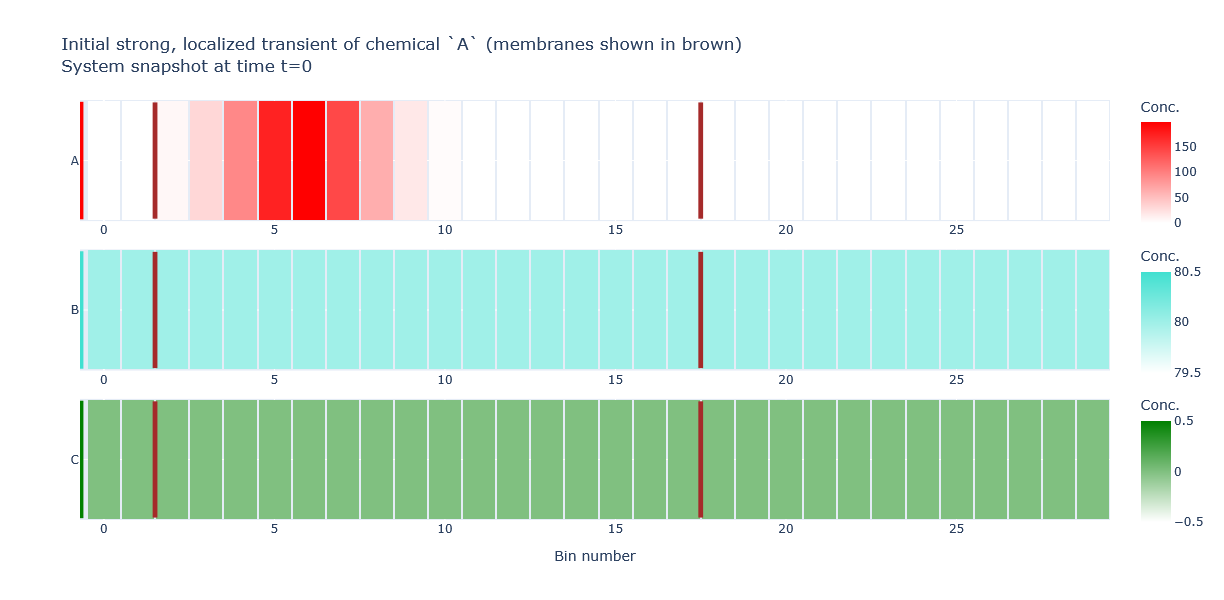

In [11]:
# Show as heatmap (including the membranes, shown in brown)
bio.system_heatmaps(title_prefix="Initial strong, localized transient of chemical `A` (membranes shown in brown)")

### The initial transient of `A` is localized within the compartment (organelle) between bins 2 and 18

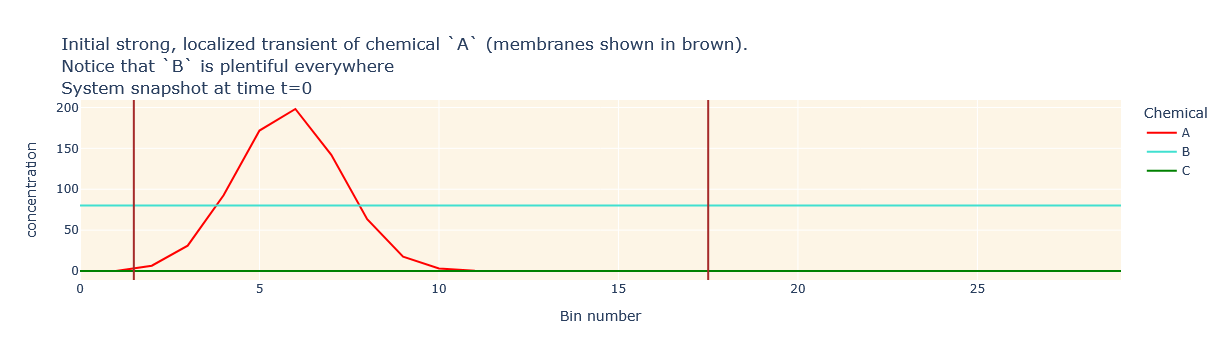

In [12]:
# Visualize the system state so far
bio.visualize_system(title_prefix=["Initial strong, localized transient of chemical `A` (membranes shown in brown).", 
                                   "Notice that `B` is plentiful everywhere"])

In [13]:
df = bio.describe_state()
df

SYSTEM STATE at Time t = 0:
30 bins and 3 chemical species
Membranes present:  [(2, 18)]


Species  Diff rate  Bin 0  Bin 1      Bin 2      Bin 3      Bin 4  \
0       A      100.0    0.0    0.0   6.451484  30.996376  92.555278   
1       B      800.0   80.0   80.0  80.000000  80.000000  80.000000   
2       C      500.0    0.0    0.0   0.000000   0.000000   0.000000   

        Bin 5       Bin 6     Bin 7  ...  Bin 20  Bin 21  Bin 22  Bin 23  \
0  171.763341  198.106523  142.0058  ...     0.0     0.0     0.0     0.0   
1   80.000000   80.000000   80.0000  ...    80.0    80.0    80.0    80.0   
2    0.000000    0.000000    0.0000  ...     0.0     0.0     0.0     0.0   

   Bin 24  Bin 25  Bin 26  Bin 27  Bin 28  Bin 29  
0     0.0     0.0     0.0     0.0     0.0     0.0  
1    80.0    80.0    80.0    80.0    80.0    80.0  
2     0.0     0.0     0.0     0.0     0.0     0.0  

[3 rows x 32 columns]

In [14]:
df[df.columns[2:21]]  # Zoom in where the action is

Bin 0  Bin 1      Bin 2      Bin 3      Bin 4       Bin 5       Bin 6  \
0    0.0    0.0   6.451484  30.996376  92.555278  171.763341  198.106523   
1   80.0   80.0  80.000000  80.000000  80.000000   80.000000   80.000000   
2    0.0    0.0   0.000000   0.000000   0.000000    0.000000    0.000000   

      Bin 7      Bin 8      Bin 9     Bin 10     Bin 11     Bin 12     Bin 13  \
0  142.0058  63.263381  17.516112   3.014131   0.322348   0.021425   0.000885   
1   80.0000  80.000000  80.000000  80.000000  80.000000  80.000000  80.000000   
2    0.0000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

      Bin 14        Bin 15        Bin 16        Bin 17  Bin 18  
0   0.000023  3.625508e-07  3.595235e-09  2.215770e-11     0.0  
1  80.000000  8.000000e+01  8.000000e+01  8.000000e+01    80.0  
2   0.000000  0.000000e+00  0.000000e+00  0.000000e+00     0.0

### Request history-keeping for some bins

In [15]:
# Request to save the concentration history at the bins with the initial concentration injection, 
# and the bins at, or near, both ends of the system
bio.enable_history(bins=[0, 6, 29], frequency=15, take_snapshot=True)    

History enabled for bins [0, 6, 29], for ALL chemicals


## Start the simulation of the reaction-diffusion

{'steps': 121, 'system time': '0.025208', 'time_step': 0.00020833125}


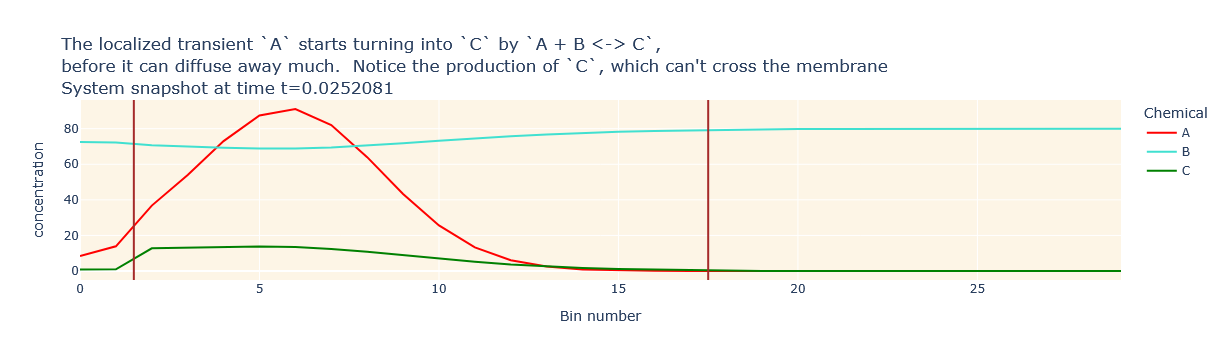

In [16]:
# The first round of reaction-diffusion, over a small time duration
bio.react_diffuse(total_duration=0.025, fraction_max_step=0.5, show_status=True)
bio.visualize_system(title_prefix=["The localized transient `A` starts turning into `C` by `A + B <-> C`, ",
                                   "before it can diffuse away much.  Notice the production of `C`, which can't cross the membrane"])

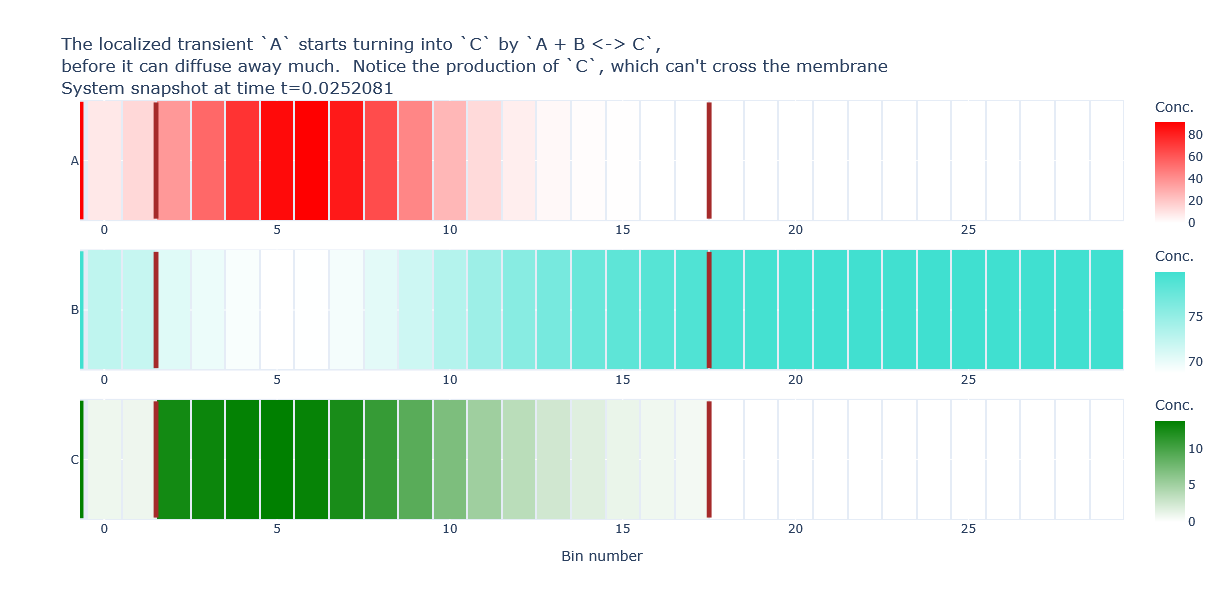

In [17]:
# SAME IN HEATMAP VIEW
bio.system_heatmaps(title_prefix=["The localized transient `A` starts turning into `C` by `A + B <-> C`, ",
                                  "before it can diffuse away much.  Notice the production of `C`, which can't cross the membrane"])

### Let's continue the reaction-diffusion

{'steps': 121, 'system time': '0.050416', 'time_step': 0.00020833125}


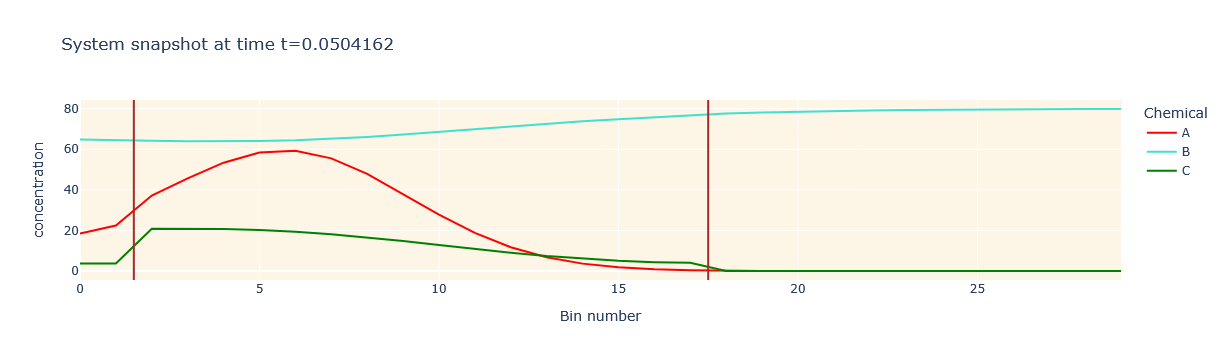

In [18]:
bio.react_diffuse(total_duration=0.025, fraction_max_step=0.5, show_status=True)
bio.visualize_system()

### `A` is crossing to some extent the nearby left membrane, but not making it in time to reach the right membrane, before getting consumed   

{'steps': 121, 'system time': '0.075624', 'time_step': 0.00020833125}


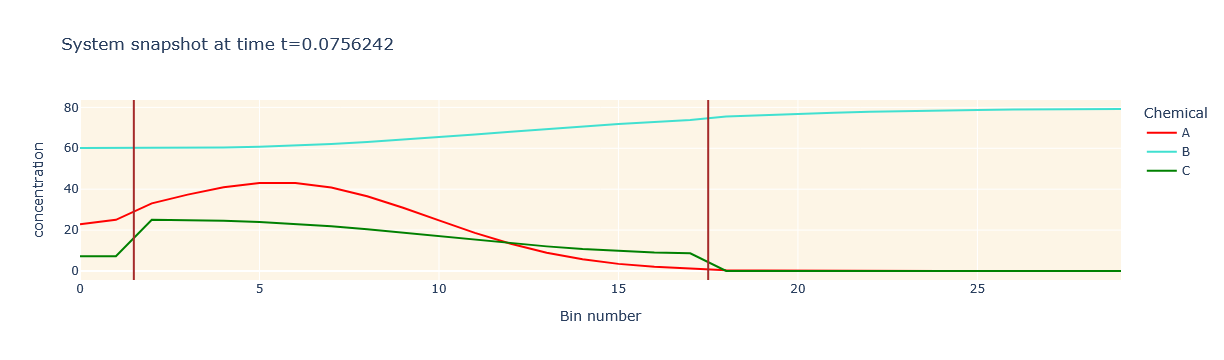

In [19]:
bio.react_diffuse(total_duration=0.025, fraction_max_step=0.5, show_status=True)
bio.visualize_system()

{'steps': 121, 'system time': '0.10083', 'time_step': 0.00020833125}


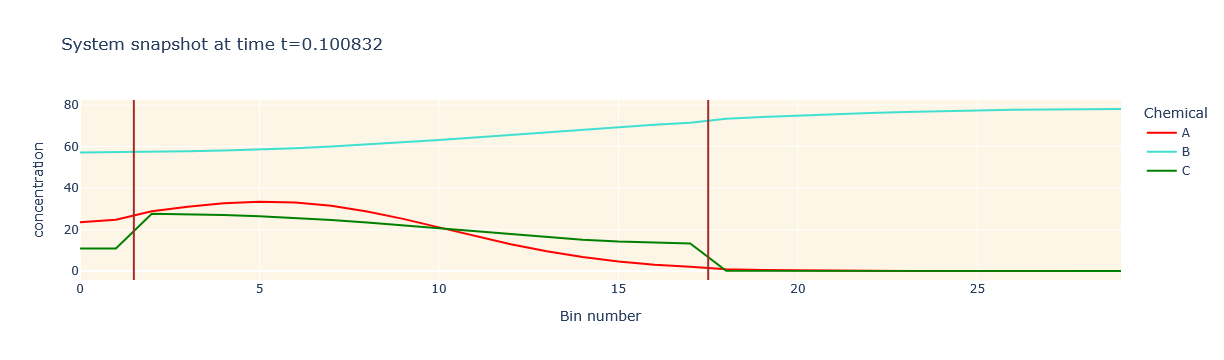

In [20]:
bio.react_diffuse(total_duration=0.025, fraction_max_step=0.5, show_status=True)
bio.visualize_system()

{'steps': 241, 'system time': '0.15104', 'time_step': 0.00020833125}


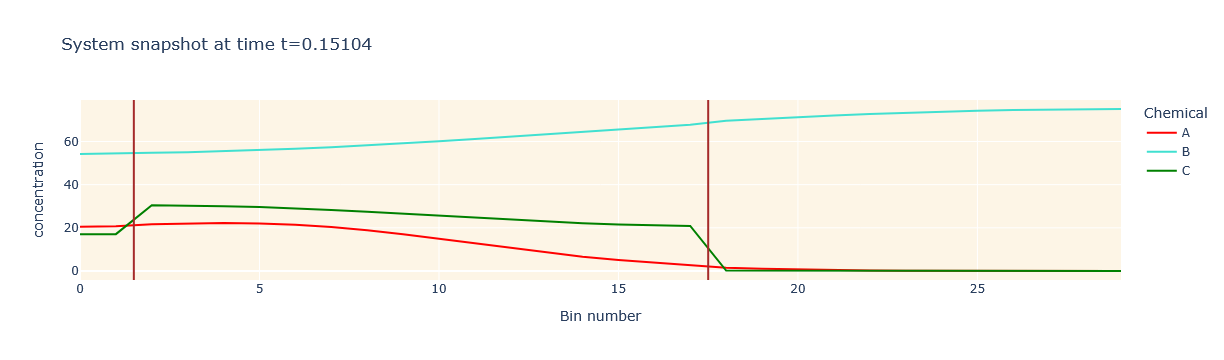

In [21]:
bio.react_diffuse(total_duration=0.05, fraction_max_step=0.5, show_status=True)
bio.visualize_system()

{'steps': 721, 'system time': '0.30125', 'time_step': 0.00020833125}


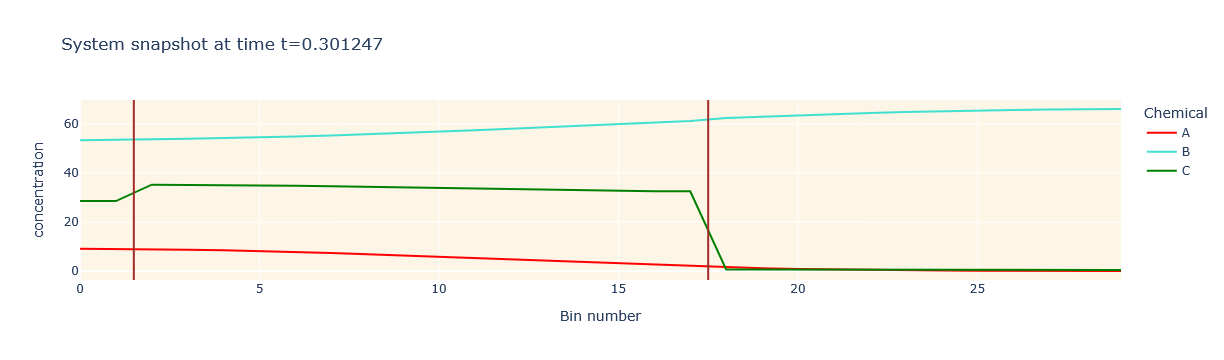

In [22]:
bio.react_diffuse(total_duration=0.15, fraction_max_step=0.5, show_status=True)
bio.visualize_system()

{'steps': 3201, 'system time': '1.5016', 'time_step': 0.00037499625000000003}


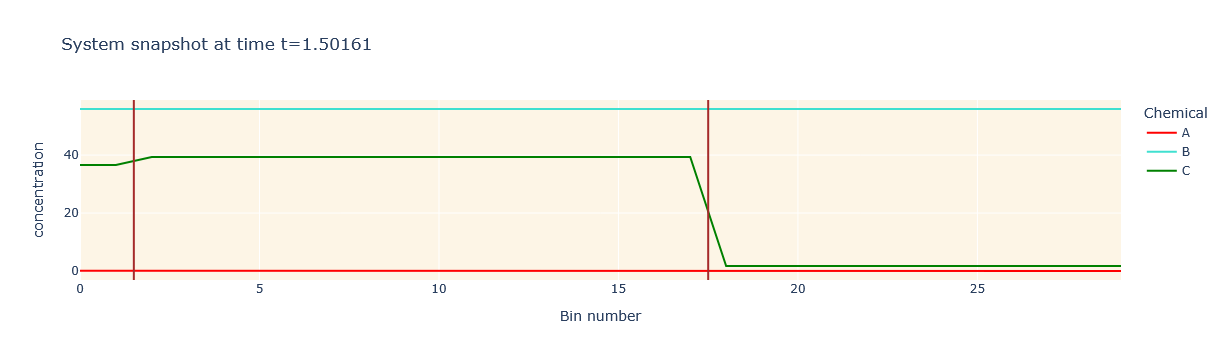

In [23]:
bio.react_diffuse(total_duration=1.2, fraction_max_step=0.9, show_status=True)
bio.visualize_system()

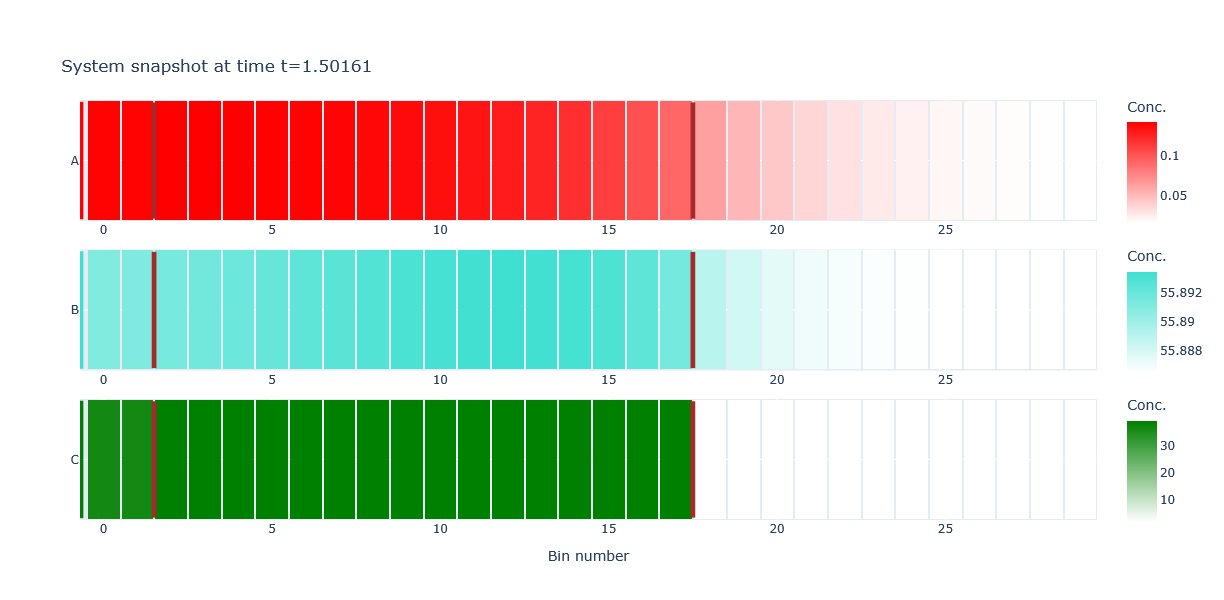

In [24]:
bio.system_heatmaps()

### Now, let's look at a few individual bins, and their concentration change with time

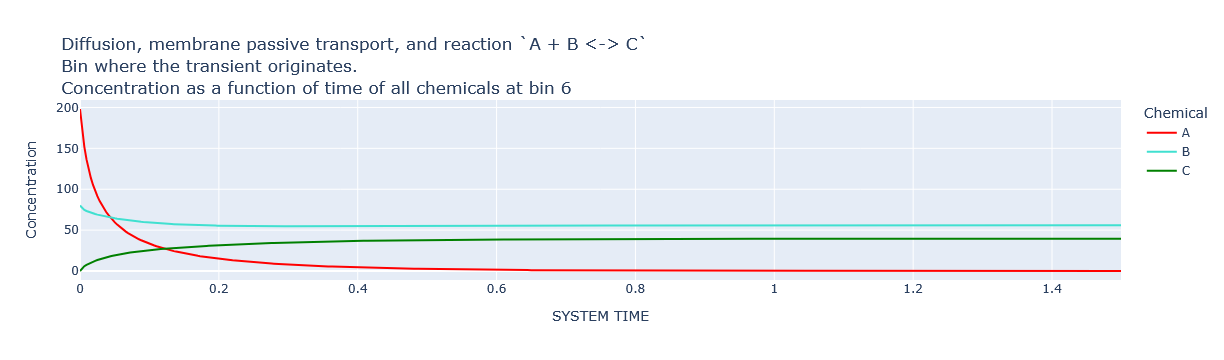

In [25]:
bio.plot_history_single_bin(title_prefix=["Diffusion, membrane passive transport, and reaction `A + B <-> C`",
                                          "Bin where the transient originates."], 
                             bin_address=6)

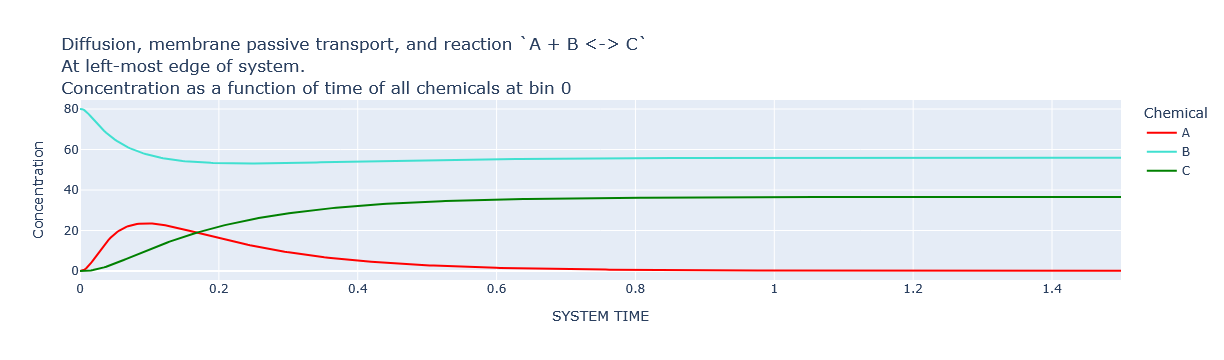

In [26]:
bio.plot_history_single_bin(title_prefix=["Diffusion, membrane passive transport, and reaction `A + B <-> C`",
                                          "At left-most edge of system."], 
                            bin_address=0)

#### Only a small amount of `A` reaches bin 0 early on, and later converts to `C`

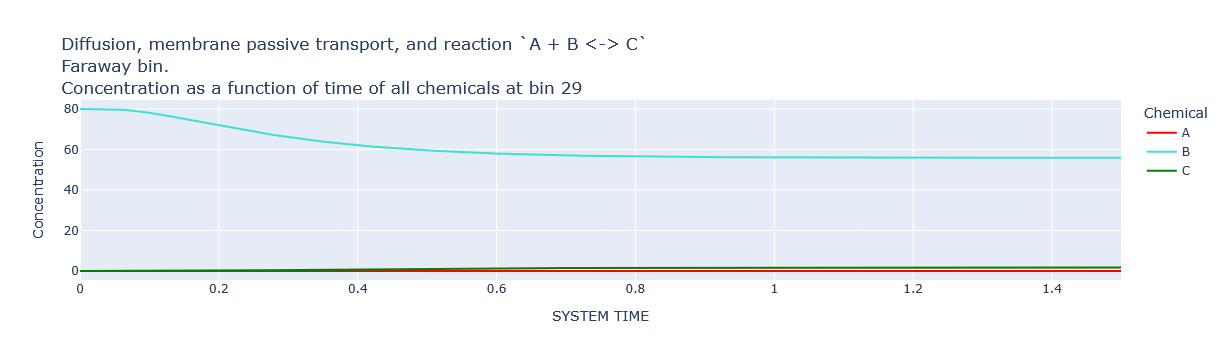

In [27]:
# Save this plot, for later comparison with the counterpart from scenario 2
scenario_1 = bio.plot_history_single_bin(title_prefix=["Diffusion, membrane passive transport, and reaction `A + B <-> C`",
                                                       "Faraway bin."], 
                                         bin_address=29)
scenario_1 

## Virtually no `A` ever reaches the faraway bins!

# SCENARIO 2 - `A` diffuses quickly
Let's repeat, starting like before, but with a much higher diffusion rate of `A`

In [28]:
# Initial conditioned just like before

bio = BioSim1D(n_bins=30, chem_data=chem_data, reactions=rxns)

bio.membranes().set_membranes(membranes=[ (2, 18) ])

bio.inject_bell_curve(chem_label="A", center=0.2, sd=0.05, max_amplitude=200., bias=0., clip=(2,17))
bio.set_uniform_concentration(chem_label="B", conc=80.)

In [29]:
# 15 times faster diffusion rate of 'A', and of its membrane permeability, than before

chem_data.set_diffusion_rate(chem_label="A", diff_rate = 1500)  # **** x15 from scenario 1

bio.membranes().change_permeability("A", 750.)  # **** x15 from scenario 1 
bio.membranes().change_permeability("B", 400.)  # Same as before
# `C` keeps the default 0 permeability (i.e., can't cross membranes)

In [30]:
# Request history-keeping for some bins
bio.enable_history(bins=[0, 6, 29], frequency=15, take_snapshot=True)   

History enabled for bins [0, 6, 29], for ALL chemicals


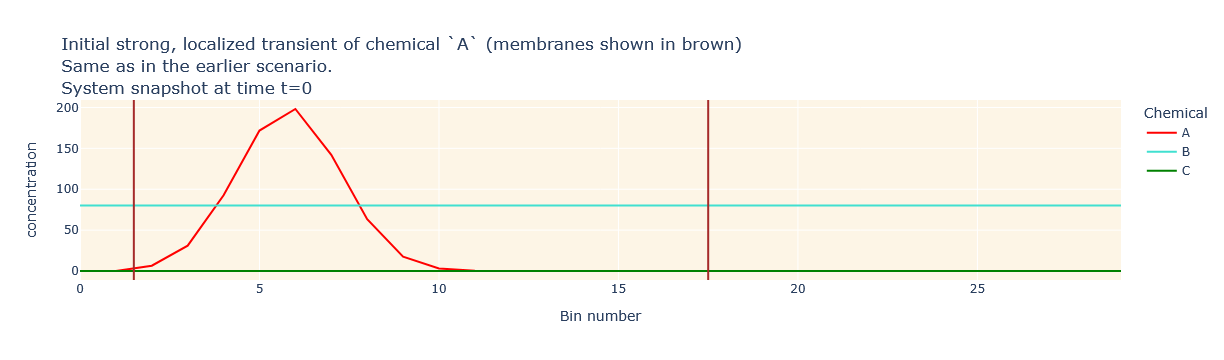

In [31]:
# Visualize the system state so far
bio.visualize_system(title_prefix=["Initial strong, localized transient of chemical `A` (membranes shown in brown)", 
                                   "Same as in the earlier scenario."])

### Repeat the simulation

{'steps': 226, 'system time': '0.025111', 'time_step': 0.00011111}


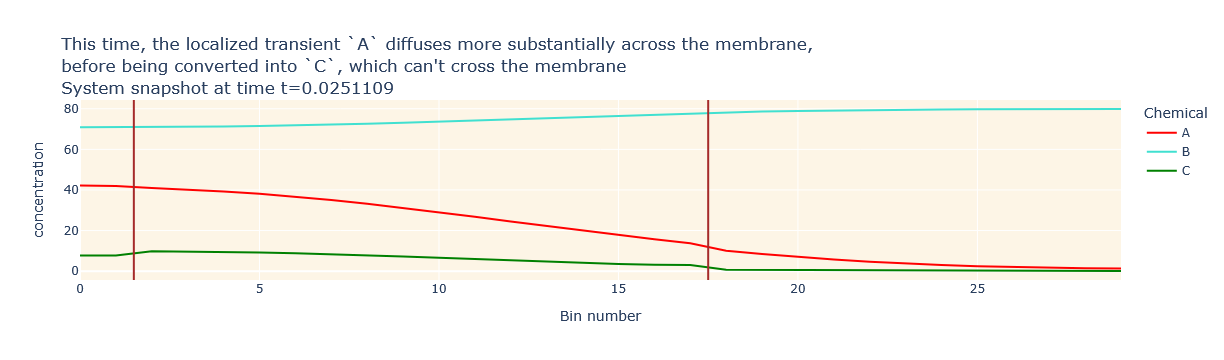

In [32]:
# The first round of reaction-diffusion, over a small time duration
bio.react_diffuse(total_duration=0.025, fraction_max_step=0.5, show_status=True)
bio.visualize_system(title_prefix=["This time, the localized transient `A` diffuses more substantially across the membrane,",
                                   "before being converted into `C`, which can't cross the membrane"])

{'steps': 226, 'system time': '0.050222', 'time_step': 0.00011111}


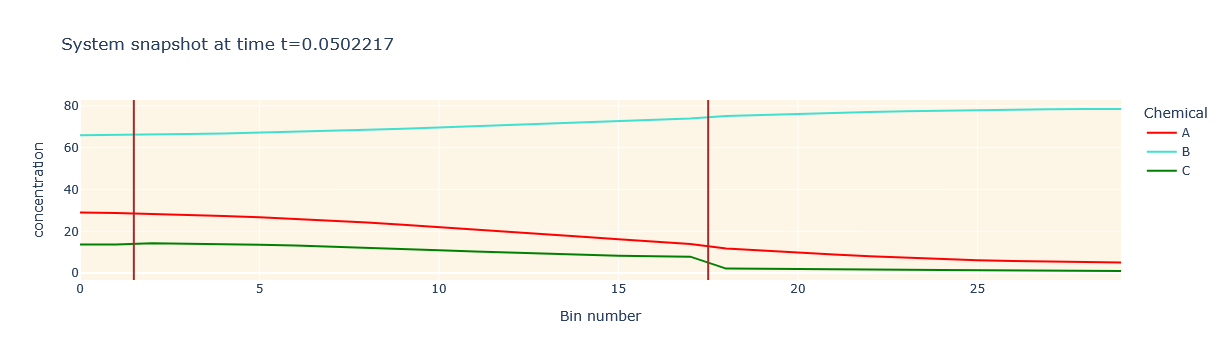

In [33]:
bio.react_diffuse(total_duration=0.025, fraction_max_step=0.5, show_status=True)
bio.visualize_system()

### In this scenario, `A` is managing to cross both membranes, to some extent, before getting consumed   

{'steps': 226, 'system time': '0.075333', 'time_step': 0.00011111}


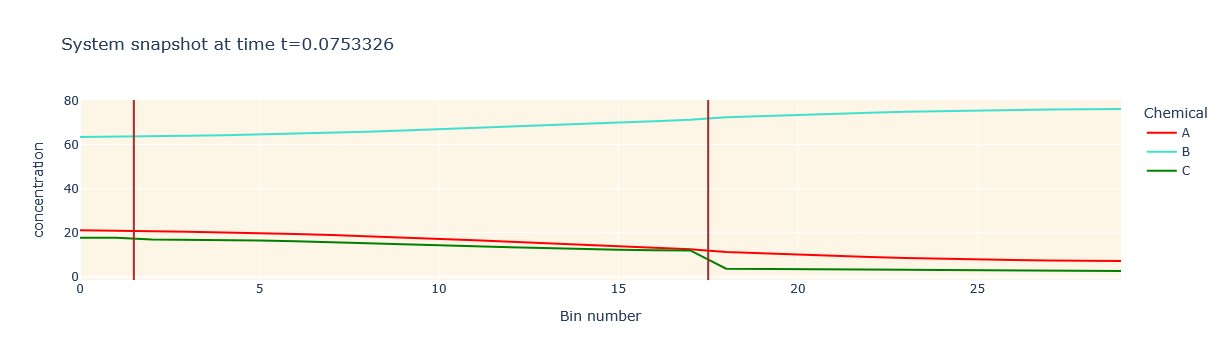

In [34]:
bio.react_diffuse(total_duration=0.025, fraction_max_step=0.5, show_status=True)
bio.visualize_system()

{'steps': 226, 'system time': '0.10044', 'time_step': 0.00011111}


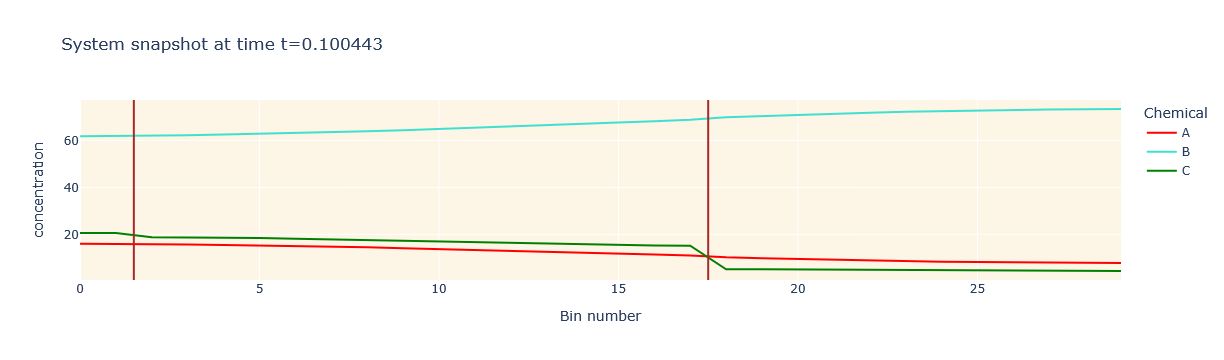

In [35]:
bio.react_diffuse(total_duration=0.025, fraction_max_step=0.5, show_status=True)
bio.visualize_system()

{'steps': 451, 'system time': '0.15055', 'time_step': 0.00011111}


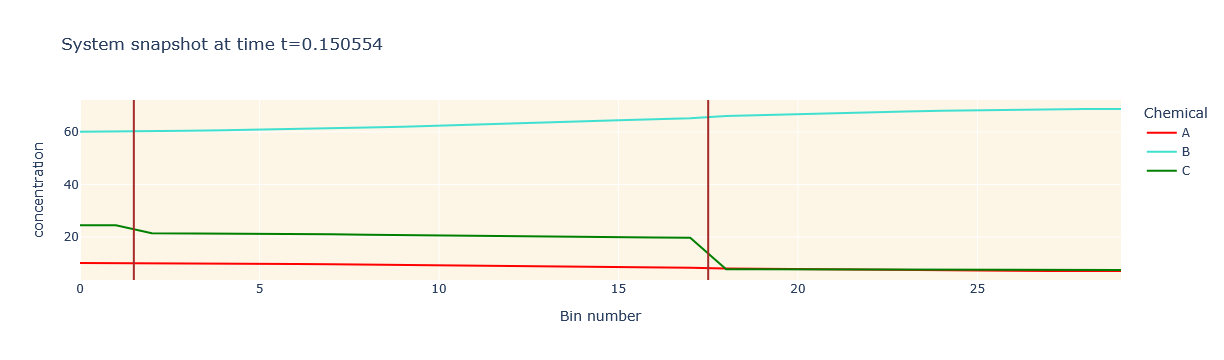

In [36]:
bio.react_diffuse(total_duration=0.05, fraction_max_step=0.5, show_status=True)
bio.visualize_system()

{'steps': 1351, 'system time': '0.30066', 'time_step': 0.00011111}


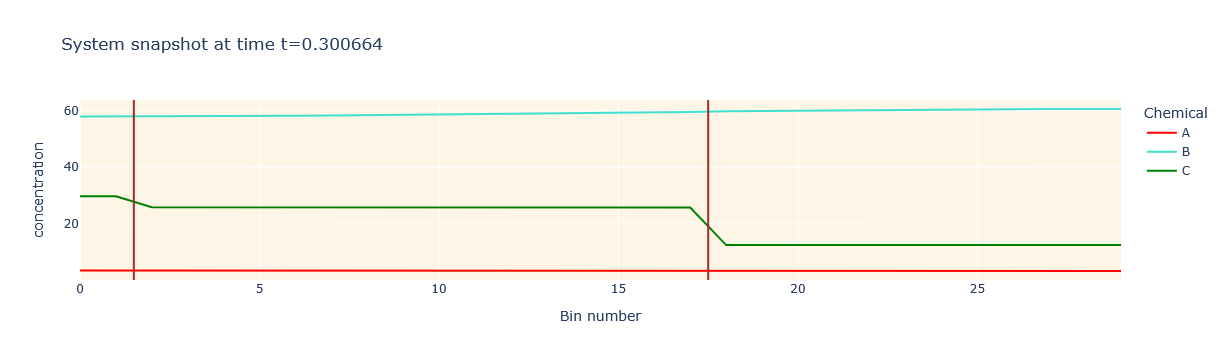

In [37]:
bio.react_diffuse(total_duration=0.15, fraction_max_step=0.5, show_status=True)
bio.visualize_system()

#### The increasingly prominent `C` (green) on the right is from `A` that managed to cross the membrane, and then converted to `C`

{'steps': 6001, 'system time': '1.5009', 'time_step': 0.000199998}


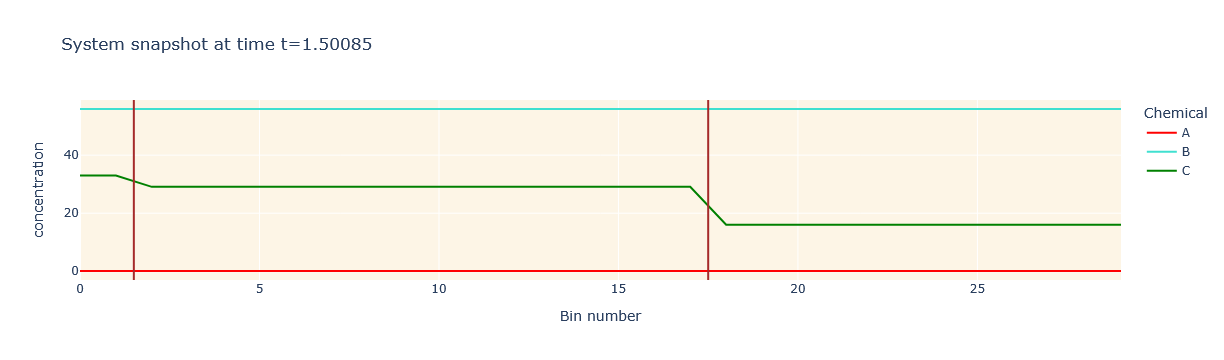

In [38]:
bio.react_diffuse(total_duration=1.2, fraction_max_step=0.9, show_status=True)
bio.visualize_system()

### Now, let's look at the faraway bin 29, and it concentration change with time

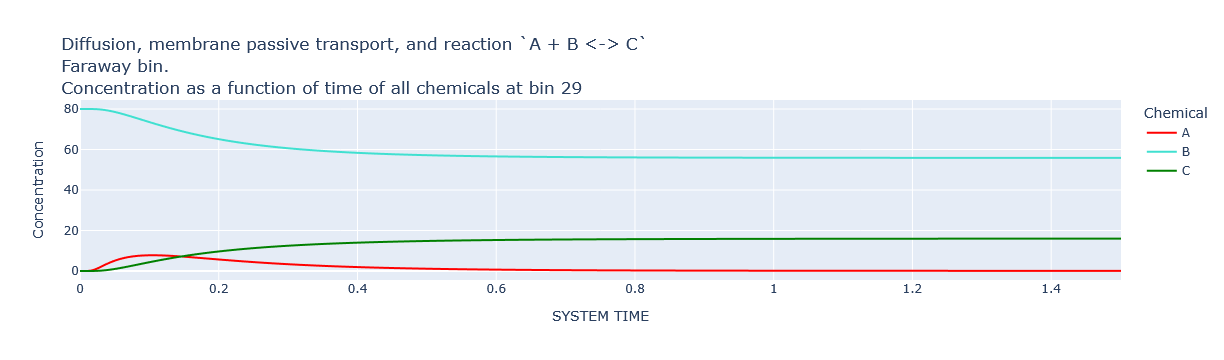

In [39]:
scenario_2 = bio.plot_history_single_bin(title_prefix=["Diffusion, membrane passive transport, and reaction `A + B <-> C`",
                                                       "Faraway bin."], 
                                         bin_address=29)
scenario_2

## A lot more `A` (eventually converted into `C`) reaches the faraway bins, compared to the earlier scenario!

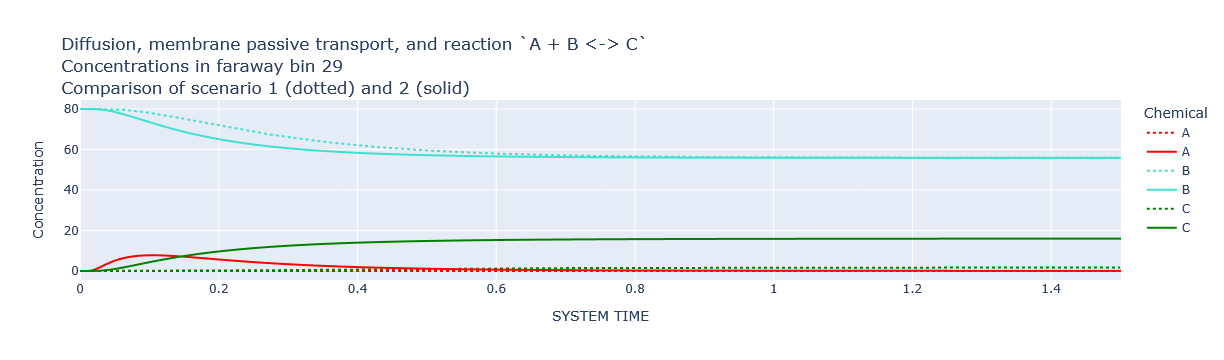

In [40]:
PlotlyHelper.combine_plots(fig_list = [scenario_1, scenario_2], 
                           title="Diffusion, membrane passive transport, and reaction `A + B <-> C`<br>Concentrations in faraway bin 29<br>Comparison of scenario 1 (dotted) and 2 (solid)", 
                           layout_index=0, modify = {0: "dot"})

Magnify plot to separate the red and green dots (very close to each other)!  

Side note: `B` eventually equilibrates to the same value under either scenario - since `B` diffuses freely across membranes, and is the excess reactant: it diffuses throughout to bind to `A`, wherever `A` might be...